# TopoCurve Analysis with FFT Filtering & Curvature Computation
This script processes a GeoTIFF Digital Elevation Model (DEM) file using FFT-based spectral filtering, calculates curvatures, and generates plots for visualization.

1. Import Required Modules

In [ ]:
#!pip install topocurve

In [ ]:
from topocurve import TopoCurve, SpectralFiltering

import numpy as np
import matplotlib.pyplot as plt

2. Load the DEM File

In [10]:
# Define the path to the TIFF file
tiff_file = '../references/DEM_files/Purgatory.tif'

# Instantiate TopoCurve object
dem = TopoCurve(tiff_file)

# Instantiate SpectralFiltering object
spectral_filter = SpectralFiltering(tiff_file)


3. Apply FFT Filtering and Compute Curvature

In [11]:
# Apply FFT filtering with a lowpass filter at 190-200
dx, dy, filtered_elevation = spectral_filter.FFT([190, 200], 'lowpass', 0)

# Compute curvature attributes
K1, K2, KM, KG = dem.CurveCalc(filtered_elevation, dx, dy, 0)

# Print results
print("Curvature values (K1, K2, KM, KG):")
print(K1, K2, KM, KG)


[[ 7.35488236e-07  1.14164410e-07  6.08988309e-07 ...  3.16171243e-06
   1.06710976e-06  7.21930850e-06]
 [ 8.57297046e-08 -1.10121122e-07  2.36292399e-07 ...  1.37876036e-06
  -1.22359656e-06  1.10255345e-06]
 [ 4.95736455e-07  1.51194215e-07 -2.40147391e-09 ... -4.88733393e-08
   1.41384897e-06  3.20500270e-06]
 ...
 [ 5.25882469e-07  5.85317470e-07  1.40993699e-07 ...  7.21079931e-08
   6.23731436e-08  2.17909003e-10]
 [ 6.03100500e-07 -4.10779101e-07  5.79447321e-07 ...  2.85185999e-08
   1.16599926e-07  2.31710117e-07]
 [ 3.16696196e-06  5.89115822e-07  5.01289558e-07 ...  1.82181086e-08
   2.60769576e-07  1.61928515e-07]] [[-2.56330501e-07 -4.48529411e-07 -5.12491094e-08 ... -6.44224512e-08
  -2.85731967e-06 -2.46914933e-06]
 [-4.20184369e-07 -1.52145992e-07  5.42561451e-09 ...  5.23174042e-08
  -1.28324015e-06 -2.88468565e-06]
 [-2.61208990e-08  2.41102829e-08 -2.99510469e-08 ... -1.01487845e-07
   8.82324693e-08 -9.70239505e-08]
 ...
 [-1.40696998e-07 -1.59634901e-08 -1.3643209

4. Plot DEM and Curvature Maps

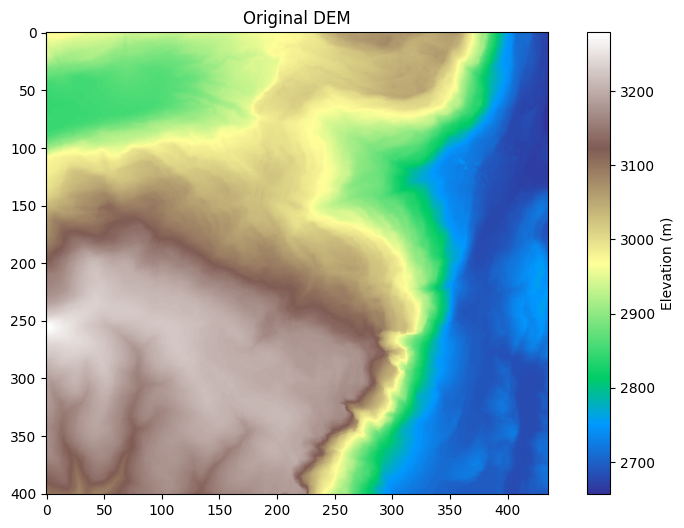

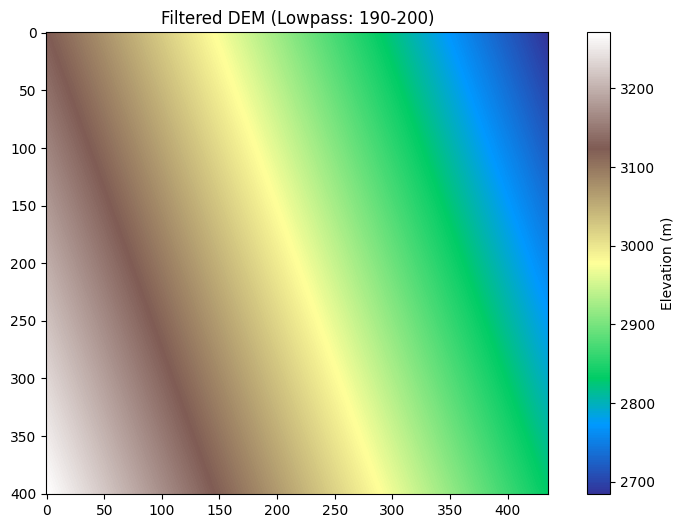

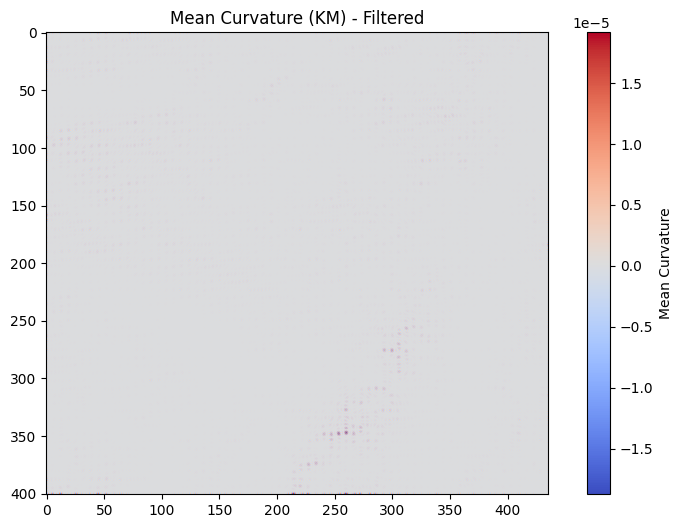

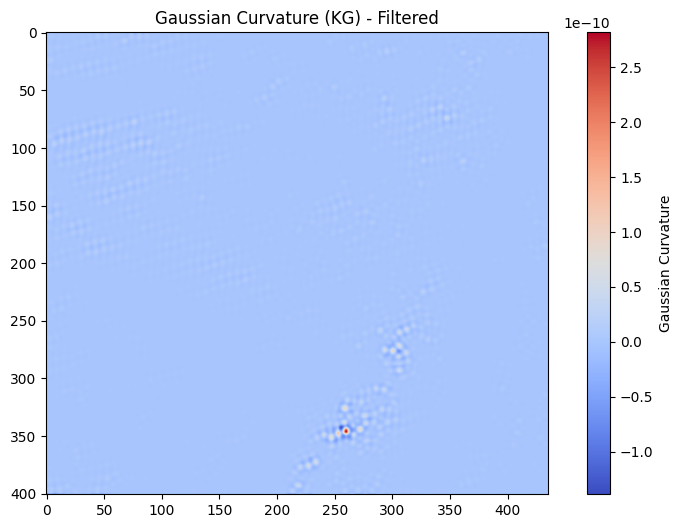

In [16]:
# Plot the filtered elevation values
plt.figure(figsize=(10, 6))
plt.imshow(dem.z_array, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title('Original DEM')
plt.show()

# Plot the filtered elevation values
plt.figure(figsize=(10, 6))
plt.imshow(filtered_elevation, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title('Filtered DEM (Lowpass: 190-200)')
plt.show()

# Plot Mean Curvature (KM)
plt.figure(figsize=(10, 6))
plt.imshow(KM, cmap='coolwarm')
plt.colorbar(label='Mean Curvature')
plt.title('Mean Curvature (KM) - Filtered')
plt.show()

# Plot Gaussian Curvature (KG)
plt.figure(figsize=(10, 6))
plt.imshow(KG, cmap='coolwarm')
plt.colorbar(label='Gaussian Curvature')
plt.title('Gaussian Curvature (KG) - Filtered')
plt.show()


5. Second Filtering (Lowpass: [90, 100])

In [13]:
dx, dy, ZFilt = spectral_filter.FFT([90, 100], "lowpass", 0.5)

# Compute curvature attributes again
K1, K2, KM, KG = dem.CurveCalc(ZFilt, dx, dy, 0)

# Print results
print("Curvature values (K1, K2, KM, KG) for second filtering:")
print(K1, K2, KM, KG)


[[ 5.12113372e-06  9.89132021e-06  8.10510187e-07 ...  1.42759593e-06
   2.24503035e-07  1.56444130e-06]
 [ 9.85389683e-06  3.63569936e-06 -3.80666136e-07 ...  4.74926708e-07
  -6.26331798e-08  3.59827450e-07]
 [ 7.12654138e-07 -6.00884850e-07  2.14994453e-06 ...  1.96158519e-07
   9.75287586e-07  2.24514251e-06]
 ...
 [ 2.00174007e-05  5.31323144e-06 -1.44414515e-06 ...  4.11710450e-07
   3.03933601e-07  2.91217779e-07]
 [ 2.89021174e-06 -1.19817697e-06  5.88994030e-06 ...  2.96368789e-08
   4.39203148e-07  1.36118077e-06]
 [ 1.73586351e-05  2.99544418e-06  2.06307893e-05 ...  7.43946305e-08
   1.29348368e-06  5.54172252e-07]] [[-1.10615309e-05 -1.94327854e-06 -1.38587057e-05 ... -2.31981044e-07
  -1.31892252e-06 -7.26366471e-07]
 [-1.86031794e-06  5.46762895e-07 -3.83019161e-06 ...  2.15407559e-08
  -6.18243564e-07 -1.35546803e-06]
 [-1.33700426e-05 -3.40186414e-06  6.43918778e-07 ... -7.17451125e-07
  -1.41123857e-07 -2.42295368e-07]
 ...
 [-1.06909219e-06  1.24457597e-06 -3.3200256

6. Plot and Save Second Filtered Results

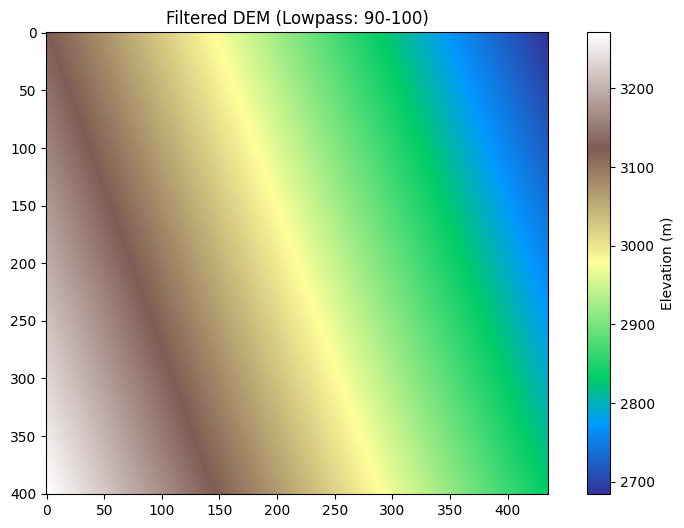

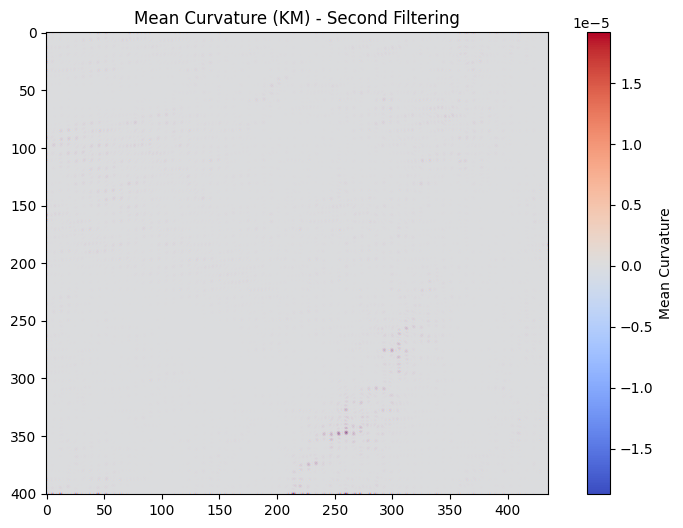

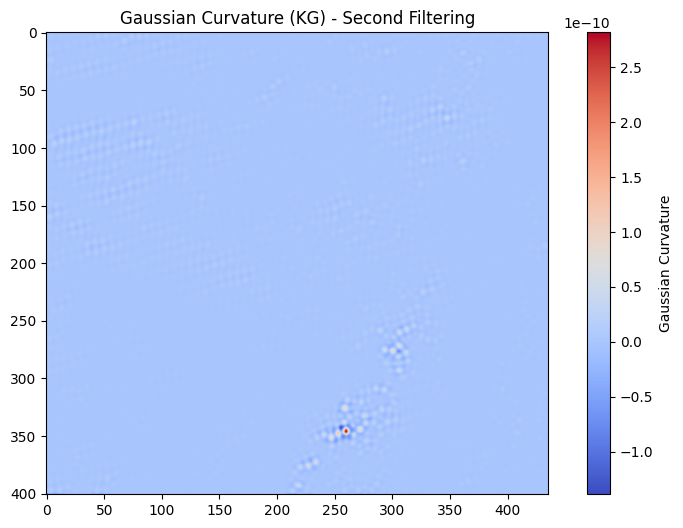

In [14]:
# Save the FFT filtered DEM
dem.plot(ZFilt, "fftdem.png")

# Plot the second filtered elevation values
plt.figure(figsize=(10, 6))
plt.imshow(ZFilt, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title('Filtered DEM (Lowpass: 90-100)')
plt.show()

# Plot Mean Curvature (KM) for the second filtered data
plt.figure(figsize=(10, 6))
plt.imshow(KM, cmap='coolwarm')
plt.colorbar(label='Mean Curvature')
plt.title('Mean Curvature (KM) - Second Filtering')
plt.show()

# Plot Gaussian Curvature (KG) for the second filtered data
plt.figure(figsize=(10, 6))
plt.imshow(KG, cmap='coolwarm')
plt.colorbar(label='Gaussian Curvature')
plt.title('Gaussian Curvature (KG) - Second Filtering')
plt.show()
